# Import Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import chart_studio.plotly as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
init_notebook_mode(connected=True)
from sklearn.svm import SVR 
import matplotlib.pyplot as plt 

# Read the CSV and Perform Basic Data Cleaning

In [2]:
data_to_load = "new_folder/googleplaystore.csv"
df_apps = pd.read_csv(data_to_load)

In [3]:
categories = list(df_apps["Category"].unique())
categories.remove('1.9')

In [4]:
a = df_apps.loc[df_apps["Category"] == "1.9"]
df_apps = df_apps.drop(int(a.index.values),axis=0)

In [5]:
df_apps = df_apps.drop(df_apps[df_apps['Rating'].isnull()].index, axis=0)

In [6]:
df_apps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
#Extract App, Installs, & Content Rating from df_apps
popApps = df_apps.copy()
popApps = popApps.drop_duplicates()
#Remove characters preventing values from being floats and integers
popApps["Installs"] = popApps["Installs"].str.replace("+","") 
popApps["Installs"] = popApps["Installs"].str.replace(",","")
popApps["Installs"] = popApps["Installs"].astype("int64")
popApps["Price"] = popApps["Price"].str.replace("$","")
popApps["Price"] = popApps["Price"].astype("float64")
popApps["Size"] = popApps["Size"].str.replace("Varies with device","0")
popApps["Size"] = (popApps["Size"].replace(r'[kM]+$', '', regex=True).astype(float) *\
        popApps["Size"].str.extract(r'[\d\.]+([kM]+)', expand=False).fillna(1).replace(['k','M'], [10**3, 10**6]).astype(int))
popApps["Reviews"] = popApps["Reviews"].astype("int64")

#popApps = popApps.sort_values(by="Installs",ascending=False)
#popApps.reset_index(inplace=True)
#popApps.drop(["index"],axis=1,inplace=True)
#popApps.loc[:40,['App','Installs','Content Rating']]

In [8]:
popAppsCopy_1 = popApps.drop(["App","Last Updated","Current Ver","Android Ver"],axis=1)
popAppsCopy = popApps.drop(["App","Last Updated","Current Ver","Android Ver","Type"],axis=1)

In [9]:
data = popAppsCopy
data = data.drop("Genres",axis =1)
data_binary_encoded = pd.get_dummies(data, columns=["Category"])
data_binary_encoded_1 = pd.get_dummies(data_binary_encoded, columns=["Content Rating"])
data_binary_encoded_1.head()

,Rating,Reviews,Size,Installs,Price,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,...,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,159,19000000.0,10000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,14000000.0,500000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,8700000.0,5000000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,215644,25000000.0,50000000,0.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,967,2800000.0,100000,0.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


# Select your features (columns)

In [10]:
X = data_binary_encoded_1.drop("Installs", axis = 1)
#feature_names = X.columns
y = data_binary_encoded_1["Installs"].values.reshape(-1, 1)
print(X.shape, y.shape)

(8892, 43) (8892, 1)


# Split the data into training and testing

In [11]:
# Split the data into training and testing

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)
### END SOLUTION

In [12]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [13]:
# Transform the training and testing data using the X_scaler and y_scaler models

### BEGIN SOLUTION
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)
### END SOLUTION

# Regression and Correlations

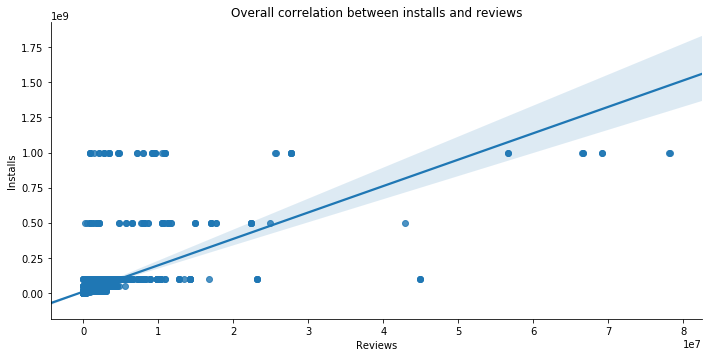

In [14]:
sns.lmplot("Reviews","Installs", data=data, aspect=2)
ax = plt.gca()
_ = ax.set_title('Overall correlation between installs and reviews')

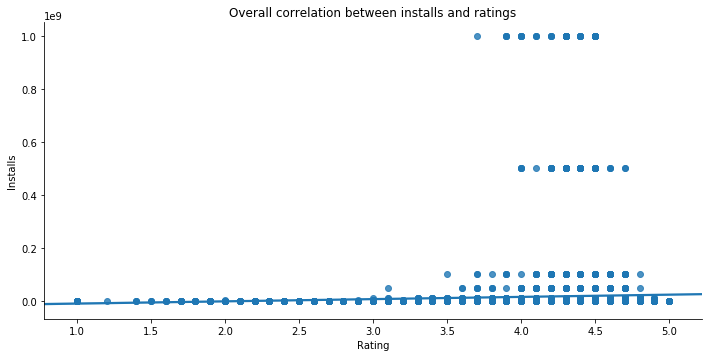

In [15]:
sns.lmplot("Rating","Installs", data=data, aspect=2)
ax = plt.gca()
_ = ax.set_title('Overall correlation between installs and ratings')

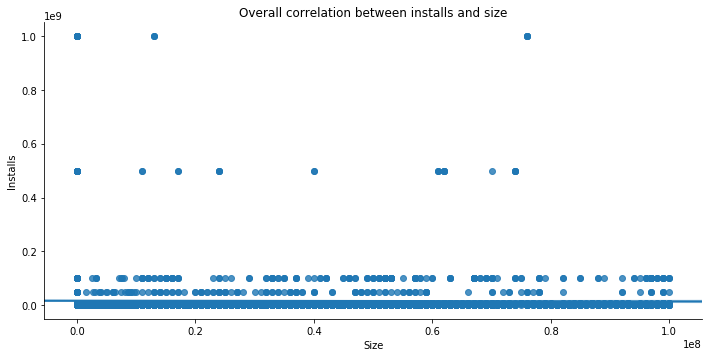

In [16]:
sns.lmplot("Size","Installs", data=data, aspect=2)
ax = plt.gca()
_ = ax.set_title('Overall correlation between installs and size')

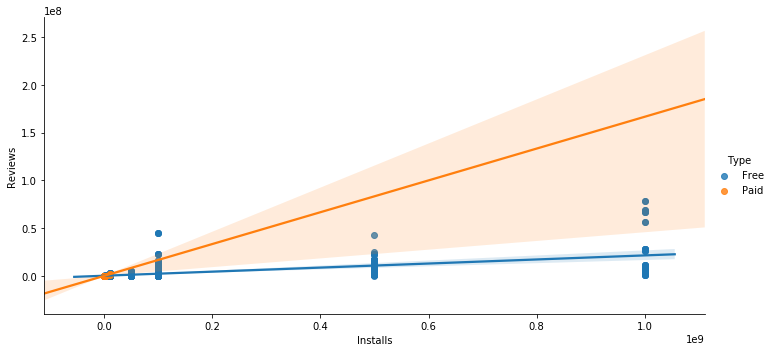

In [17]:
data_1 = popAppsCopy_1
sns.lmplot("Installs", "Reviews", data=data_1, aspect=2, hue='Type')
plt.savefig('Reviews_dis.png')

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



0.40123220273853705


<Figure size 1152x432 with 0 Axes>

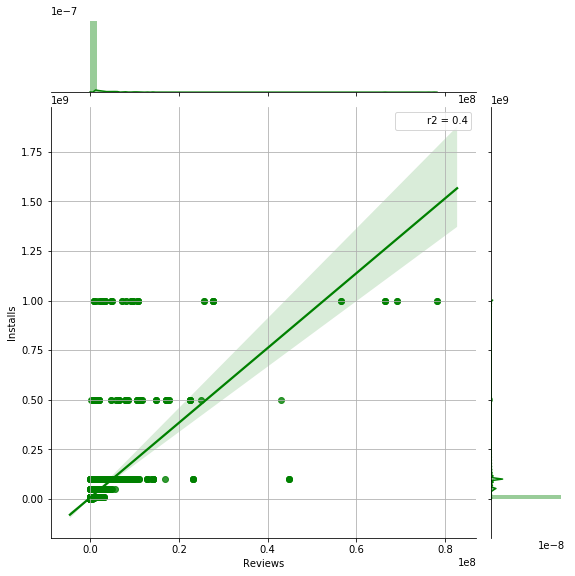

In [24]:
x = data["Reviews"]
y = data["Installs"]

from scipy import stats

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

plt.figure(figsize=(16, 6))
sns.jointplot(x, y, kind="reg", color="g",height=8,stat_func=r2)

print(r2(x,y))
plt.grid()
plt.savefig('Cor_reviews.png')

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



0.0025893811793955726


<Figure size 1152x432 with 0 Axes>

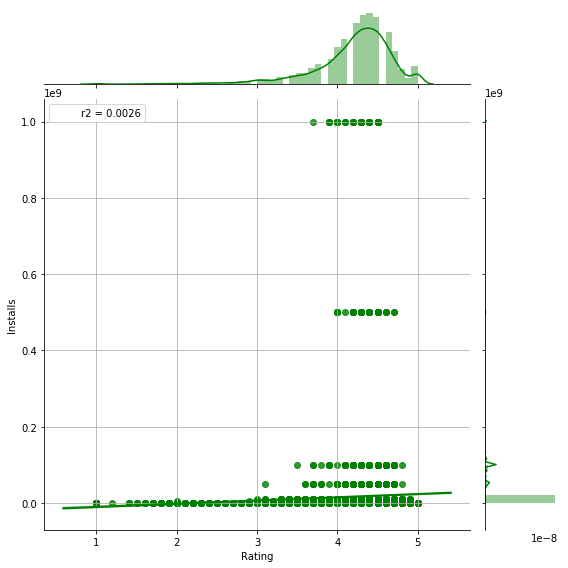

In [25]:
x = data["Rating"]
y = data["Installs"]
from scipy import stats

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

plt.figure(figsize=(16, 6))
sns.jointplot(x, y, kind="reg", color="g",height=8,stat_func=r2)

print(r2(x,y))
plt.grid()
plt.savefig('Cor_rating.png')

C:\Users\User\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1847: UserWarning:

JointGrid annotation is deprecated and will be removed in a future release.



4.457887515872851e-05


<Figure size 1152x432 with 0 Axes>

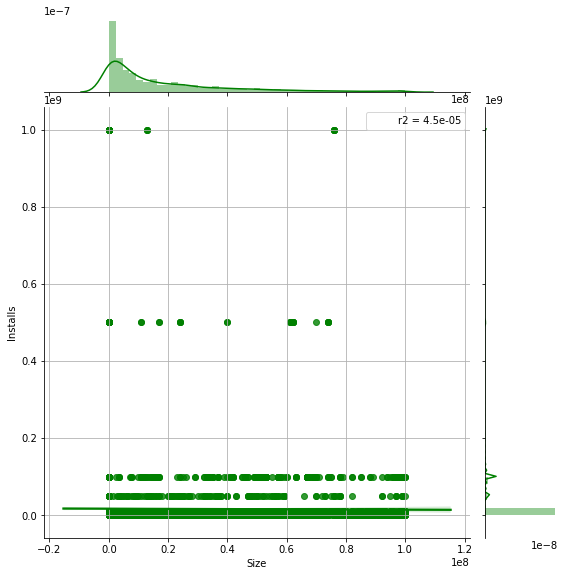

In [26]:
x = data["Size"]
y = data["Installs"]
from scipy import stats

def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

plt.figure(figsize=(16, 6))
sns.jointplot(x, y, kind="reg", color="g",height=8,stat_func=r2)

print(r2(x,y))
plt.grid()
plt.savefig('Cor_size.png')

In [21]:
from scipy import stats
stats.spearmanr(data['Size'], data['Installs'])

SpearmanrResult(correlation=0.008152744739174846, pvalue=0.4420789414684386)

In [22]:
from scipy import stats
stats.spearmanr(data['Rating'], data['Installs'])

SpearmanrResult(correlation=0.06268888401286322, pvalue=3.2908985369114987e-09)

In [23]:
from scipy import stats
stats.spearmanr(data['Reviews'], data['Installs'])

SpearmanrResult(correlation=0.9635894346687854, pvalue=0.0)

# Create a LinearRegression model and fit it to the scaled training data

In [170]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

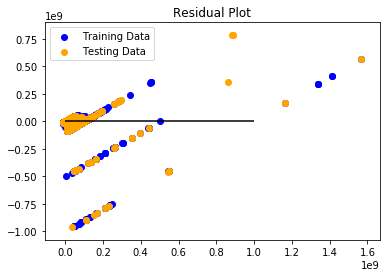

In [171]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions


predictions = model.predict(X_test)
model.fit(X_train, y_train)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")

plt.show()

In [172]:
model.score(X_test,y_test)

0.36001247740564324

In [173]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error


MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 4832497973825109.0, R2: -4170944611991278.0


# LASSO model

In [175]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6522985186926324, R2: 0.3616919860008526


In [179]:
coeffs = lasso.coef_

In [180]:
coeffs

array([ 5.07530389e-04,  6.32073802e-01, -2.24187699e-02, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  6.31163738e-02, -0.00000000e+00,
       -0.00000000e+00,  3.29307639e-03, -0.00000000e+00, -2.86545001e-03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  2.92753107e-02, -0.00000000e+00, -0.00000000e+00,
        2.50488461e-02,  4.11880930e-02, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  3.06958180e-02,  2.63470610e-02,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.37985831e-02,  0.00000000e+00])

In [177]:
coeffs = lasso.sparse_coef_

In [178]:
print(coeffs)

  (0, 0)	0.0005075303892987927
  (0, 1)	0.6320738024110567
  (0, 2)	-0.02241876989628763
  (0, 10)	0.06311637378164016
  (0, 13)	0.0032930763895594514
  (0, 15)	-0.002865450014805148
  (0, 25)	0.029275310667730814
  (0, 28)	0.025048846080946652
  (0, 29)	0.041188092981913685
  (0, 34)	0.030695818028277384
  (0, 35)	0.02634706100761414
  (0, 41)	0.013798583124425537


# Ridge model

In [181]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import Ridge


ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6540150222282598, R2: 0.36001229804901613


# ElasticNet model

In [183]:
# Note: Use an alpha of .01 when creating the model for this activity
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.6518293385907895, R2: 0.3621511031235092


In [114]:
rr = Ridge(alpha=0.01)

In [115]:
rr.fit(X_train_scaled, y_train_scaled)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [116]:
Ridge_test_score = rr.score(X_test_scaled, y_test_scaled)
Ridge_train_score = rr.score(X_train_scaled,y_train_scaled)
print(Ridge_train_score)
print(Ridge_test_score)

0.43420516232030293
0.36001229804901613


In [164]:
X_knee = X[["Reviews","Size","Rating","Category_COMICS","Category_EDUCATION","Category_EVENTS","Category_MEDICAL",
           'Category_PERSONALIZATION', 'Category_PHOTOGRAPHY','Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
           "Content Rating_Mature 17+"]]
y_knee = y
print(X_knee.shape, y_knee.shape)

(8892, 12) (8892,)


In [165]:
from sklearn.model_selection import train_test_split

X_train_k, X_test_k, y_train_k, y_test_k = train_test_split(X_knee, y_knee, random_state=42)


In [166]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_k, y_train_k)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

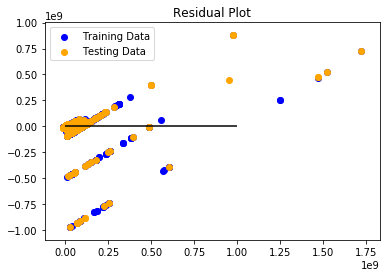

In [167]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions
predictions = model.predict(X_test_k)
model.fit(X_train_k, y_train_k)
plt.scatter(model.predict(X_train_k), model.predict(X_train_k) - y_train_k, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_k), model.predict(X_test_k) - y_test_k, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_k.min(), xmax=y_test_k.max())
plt.title("Residual Plot")

plt.show()

In [169]:
model.score(X_test_k,y_test_k)

0.28909198148107307

In [184]:
rr = Ridge(alpha=0.01)

In [186]:
rr.fit(X_train_k, y_train_k)
Ridge_test_score = rr.score(X_test_k, y_test_k)
Ridge_train_score = rr.score(X_train_k,y_train_k)
print(Ridge_train_score)
print(Ridge_test_score)

0.4363482844591915
0.28909181797736283


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning:

Ill-conditioned matrix (rcond=9.97529e-18): result may not be accurate.

